In [3]:
%matplotlib inline
#
from lrgsglib.core import *
from lrgsglib.funcs import create_Lattice2D_WeigvV
#
move_to_rootf()
plt.style.use("ipynb/nb_plotsheet.mplstyle")
#
subDatPth = os.path.join('plot', 'paper', 'suppinf', '')
datPth = os.path.join('data', subDatPth)
subPthStr = ['defects_plots']
datPthDict = {s: os.path.join(datPth, s, '') for s in subPthStr}
for path in datPthDict.values(): os.makedirs(path, exist_ok=True)

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


## Eigenstate: squared, Single, Z err, X err

In [2]:
side = 96
geo = 'squared'
#
randZpList = [0.05, 0.10, 0.25]
randXpList = [0.10, 0.25, 0.50]
#
cmap = ListedColormap([cred, cblu])
#
start_letter = 'a'  # Change this to start from a different letter
total_subplots = 3
alphabet = string.ascii_lowercase
start_index = alphabet.index(start_letter.lower())
labels = [fr"\textbf{{({alphabet[(start_index + i) % 26]})}}" for i in range(total_subplots)]

In [3]:
for cell in ['rand', 'randZERR', 'randXERR']:
    match cell:
        case 'rand' | 'randZERR':
            thezip = zip(randZpList, labels)
        case 'randXERR':
            thezip = zip(randXpList, labels)
    for pflip, ll in thezip:
        l = create_Lattice2D_WeigvV(cell=cell, side1=side, geo='squared', 
                                    pflip=pflip, pbc=False, 
                                    init_nw_dict=True, with_positions=True)
        #
        fig, ax = plt.subplots(ncols=2)
        #
        ticks = [0, side-1]
        ticksl = [r'$1$', fr'${side}$']
        #
        arr = flip_to_positive_majority_adapted(l.bin_eigV().reshape(l.syshape))
        im = ax[0].imshow(np.rot90(arr), cmap=cmap, 
                          origin='upper', interpolation='none')
        #
        ax[0].set_xticks(ticks)
        ax[0].set_yticks(ticks)
        ax[0].set_xticklabels(ticksl)
        ax[0].set_yticklabels(ticksl)
        #
        divdr, caxm, cbar = imshow_colorbar_caxdivider(im, ax[0])
        cbar.set_ticks([])
        #
        (x_txt, y_txt) = -0.15, 1.05
        ax[0].text(x_txt, y_txt, ll,
                   transform=ax[0].transAxes, fontsize=50, 
                   ha='center', va='center'
        )
        #
        ax[1].set_aspect('equal')
        #
        match cell:
            case 'rand' | 'randZERR':
                kwargsNxDraw = dict(width=1, node_color='black', node_size=1)
                nx.draw(l.G, l.get_node_pos(), ax[1], 
                    edge_color=l.get_edge_color(pec='none'), **kwargsNxDraw)
                if cell == 'rand':
                    radius = 1.32
                elif cell == 'randZERR':
                    radius = l.r_c
                match cell:
                    case 'rand':
                        circles = [tuple([i[0][0], i[0][1]+.5]) 
                                if (i[0][1] == i[1][1] - 1) 
                                else tuple([i[0][0]+.5, i[0][1]]) 
                                for i in l.fleset['H']]
                        nodeAll = set(circles)
                    case 'randZERR':
                        circles = np.array(l.nwDict.rNodeFlip['H'])
                        nodeAll = set(l.nwDict.rNodeFlip['H'])
                        ndOther = nodeAll - set(lCl)
                lCl = find_largest_cluster_circle2D(circles, radius)
                ndOther = nodeAll - set(lCl)
                match cell:
                    case 'rand':
                        for cc in nodeAll:
                            circC = (cc[0], cc[1])
                            col = 'k' if circC in ndOther else 'r'
                            circle = plt.Circle(circC, radius, 
                                                color=col, alpha=.25)
                            ax[1].add_patch(circle)
                    case 'randZERR':
                        for cc in nodeAll:
                            circC = (cc[0]-.5, cc[1]-.5)
                            col = 'k' if cc in ndOther else 'r'
                            circle = plt.Circle(circC, radius, 
                                                color=col, alpha=.25)
                            ax[1].add_patch(circle)
            case 'randXERR':
                l.load_eigV_on_g()
                kwargsNxDraw = dict(width=2, edgecolors='black', node_size=0)
                nx.draw(l.G, l.get_node_pos(), ax[1],
                    edge_color=l.get_edge_color(pec='none'), **kwargsNxDraw)
        fname = f'suppli_DEF_{geo}_{side}_{pflip}_{cell}.png'
        fig.tight_layout()
        fig.savefig(os.path.join(datPthDict['defects_plots'], fname), 
            bbox_inches='tight', transparent=True, dpi=300)
        plt.close('all')

KeyboardInterrupt: 

## Other

In [4]:
side = 96
pflip = 0.103
geometry = 'squared'
cell = 'rand'

In [5]:
configurations = [
    (side, True),
    (32, False)
]
#
for i, (side1, pbc) in enumerate(configurations):
    l_tmp = Lattice2D(
        side1=side1,
        geo=geometry,
        pflip=pflip,
        pbc=pbc,
        sgpath=subDatPth,
        with_positions=True,
        init_nw_dict=True
    )
    #
    fliplist = l_tmp.nwDict[cell]['G']
    l_tmp.flip_sel_edges(fliplist)
    l_tmp.compute_k_eigvV()
    #
    if i == 0:
        l = l_tmp
    elif i == 1:
        l_draw = l_tmp

TypeError: 'int' object is not subscriptable

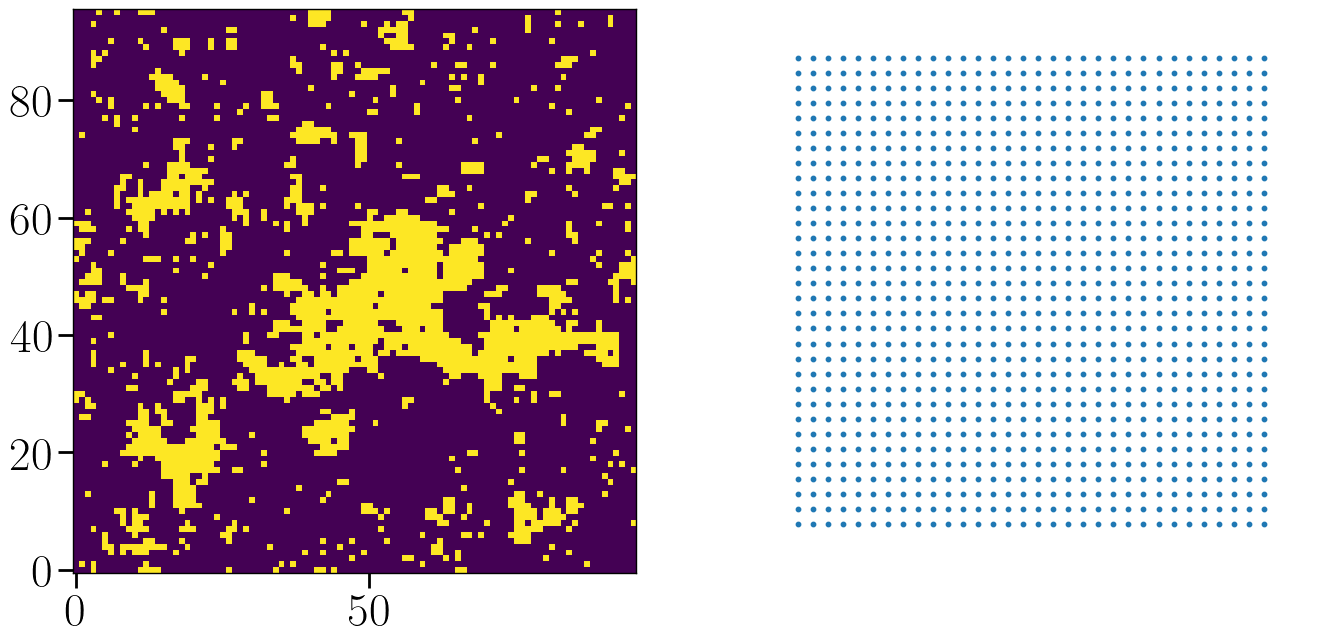

In [7]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(np.sign(l.eigV[0].reshape(l.syshape)))
nx.draw(l_draw.G, pos = l_draw.get_node_pos(), 
    width=0, ax=ax[1], node_size=10)
ax[1].set_aspect('equal')
if cell == 'rand':
    for i in l_draw.fleset['G']:
        if i[0][1] == i[1][1] - 1:
            circle_center = (i[0][0], i[0][1]+.5)
        elif i[0][0] == i[1][0] - 1:
            circle_center = (i[0][0]+.5, i[0][1])
        circle = plt.Circle(circle_center, l_draw.r_c, color='red', alpha=0.25)
        ax[1].add_patch(circle)
elif cell == 'randXERR':
    for circle_center in l_draw.nwDict.rNodeFlip['G']:
        circle = plt.Circle(circle_center, l_draw.r_c, color='red', alpha=0.25)
        ax[1].add_patch(circle)
elif cell == 'randZERR':
    for i in l_draw.nwDict.rNodeFlip['G']:
        circle_center = (i[0]-.5, i[1]-.5)
        circle = plt.Circle(circle_center, l_draw.r_c, color='red', alpha=0.25)
        ax[1].add_patch(circle)
fig.tight_layout()
fig.savefig(f"{datPthDict['defects_plots']}{geometry}_{side}_{pflip}_{cell}.pdf", 
    bbox_inches='tight', transparent=True)
# plt.close('all')

In [ ]:
rows, cols= 64, 64
p = 0.1
random_matrix = np.random.rand(rows*cols)
binary_matrix = np.where(random_matrix < p, 1, -1)


In [ ]:
rows, cols= 128, 128
pinf = []
for p in np.linspace(0.1, 0.9, 50):
    random_matrix = np.random.rand(rows, cols)
    binary_matrix = np.where(random_matrix < p, 1, -1)
    pinf.append(np.abs(np.where(binary_matrix.flatten() == 1)[0].shape[0] / (rows*cols) - np.where(binary_matrix.flatten() == -1)[0].shape[0] / (rows*cols)))

In [ ]:
plt.plot(np.linspace(0.1, 0.9, 50), pinf)

In [ ]:
plt.imshow(binary_matrix)

In [ ]:
l = Lattice2D(64)
nx.set_node_attributes(l.G, values=random.choices([-1, 1], k=l.G.number_of_nodes()))

In [ ]:
l = Lattice2D(2048, pflip=0.001, with_positions=False)
l.flip_sel_edges(l.nwDict['rand']['G'])

In [ ]:
l.compute_k_eigvV()